<a href="https://colab.research.google.com/github/KhaledSaiful/CIND-820-Big-Data-Project/blob/main/Copy_of_CIND_820_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import nan as na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as sd
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score


In [ ]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

# Display the first few rows
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# we need check first wheather our dataset having null values or not
data.isnull().sum() #or data.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.shape # shape which is really help to find no of rows and columns

(12330, 18)

In [ ]:
data.describe() # when we describe our data set we could see our mean,meadian,min,max and all

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail(5) # tail means printing the last 5 records

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
print('Independent Features: ',list(data.columns[:-1]))

Independent Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [ ]:
print('Target Feature:',list(data.columns[-1:]))

Target Feature: ['Revenue']


In [ ]:
#Analysis and Visualization
#Here below we splited the numerical and catagorical columns

num_cols=[col for col in data.select_dtypes(include=np.number)]
cat_cols=[col for col in data.select_dtypes(exclude=np.number)]

print('Numerical column:',len(num_cols),'catagorcal column:',len(cat_cols))
print('Numerical Column Names:',num_cols)
print('catagorcial Column Names:',cat_cols)


Numerical column: 14 catagorcal column: 4
Numerical Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
catagorcial Column Names: ['Month', 'VisitorType', 'Weekend', 'Revenue']


In [ ]:
# here below we created the density plot for numerical columns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

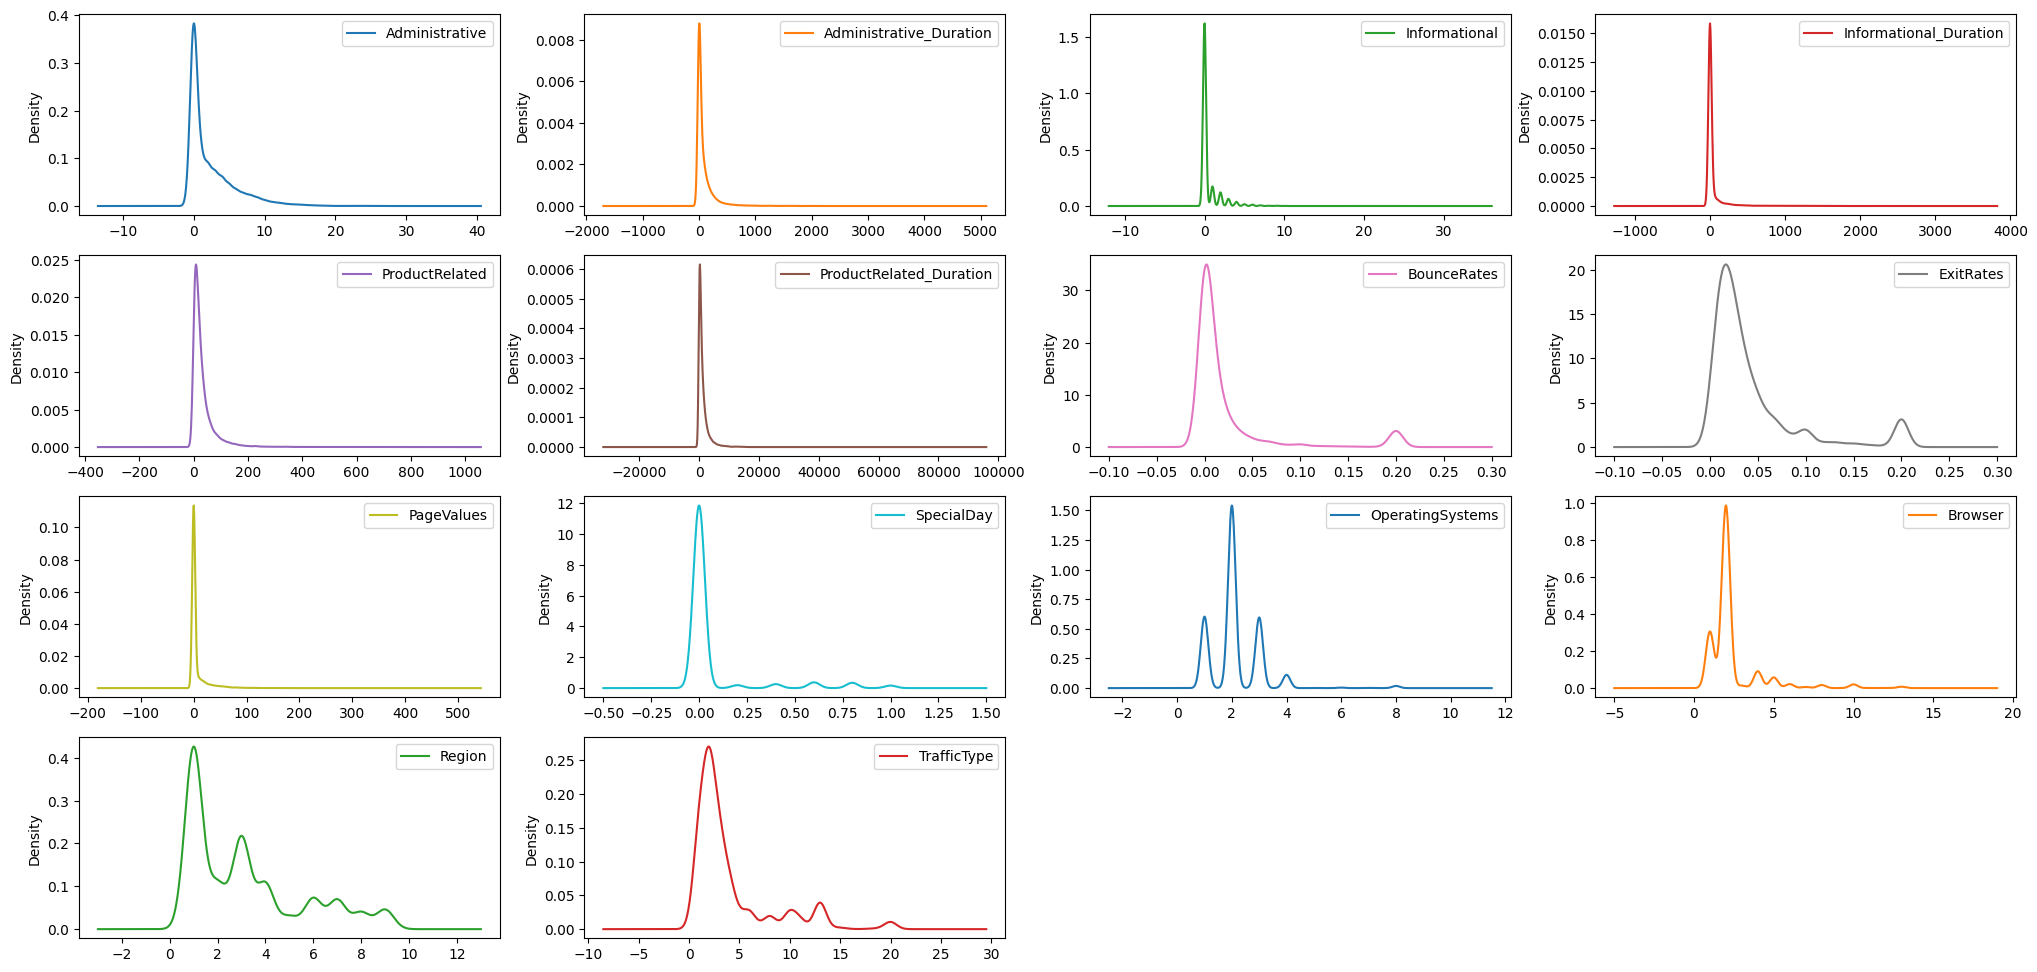

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create density plots for numerical columns
data[num_cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(25, 12))
#plt.show()


Administrative                Axes(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    Axes(0.327174,0.712609;0.168478x0.167391)
Informational              Axes(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     Axes(0.731522,0.712609;0.168478x0.167391)
ProductRelated                Axes(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    Axes(0.327174,0.511739;0.168478x0.167391)
BounceRates                Axes(0.529348,0.511739;0.168478x0.167391)
ExitRates                  Axes(0.731522,0.511739;0.168478x0.167391)
PageValues                     Axes(0.125,0.31087;0.168478x0.167391)
SpecialDay                  Axes(0.327174,0.31087;0.168478x0.167391)
OperatingSystems            Axes(0.529348,0.31087;0.168478x0.167391)
Browser                     Axes(0.731522,0.31087;0.168478x0.167391)
Region                            Axes(0.125,0.11;0.168478x0.167391)
TrafficType                    Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

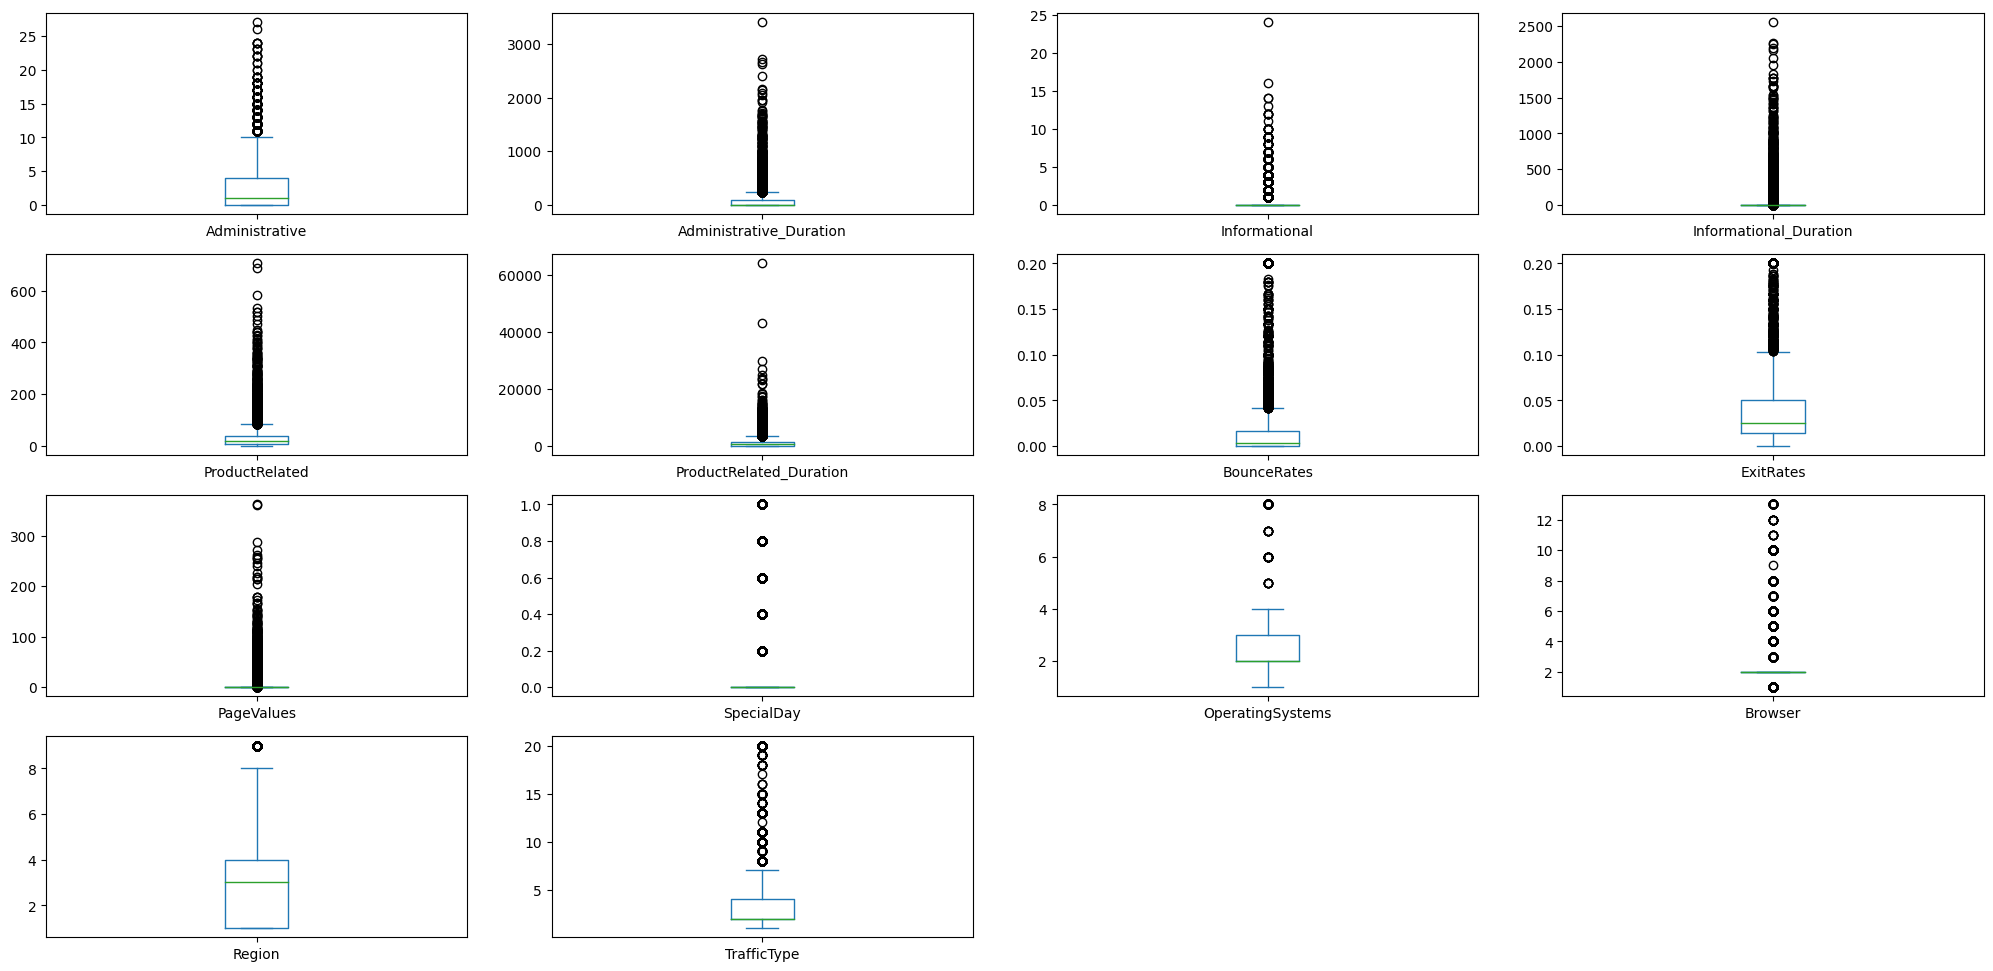

In [ ]:
#Print the box plot for numerical col
data[num_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data.columns

# To get value counts for the 'Revenue' column
data['Revenue'].value_counts()



False    10422
True      1908
Name: Revenue, dtype: int64

<Axes: xlabel='Month'>

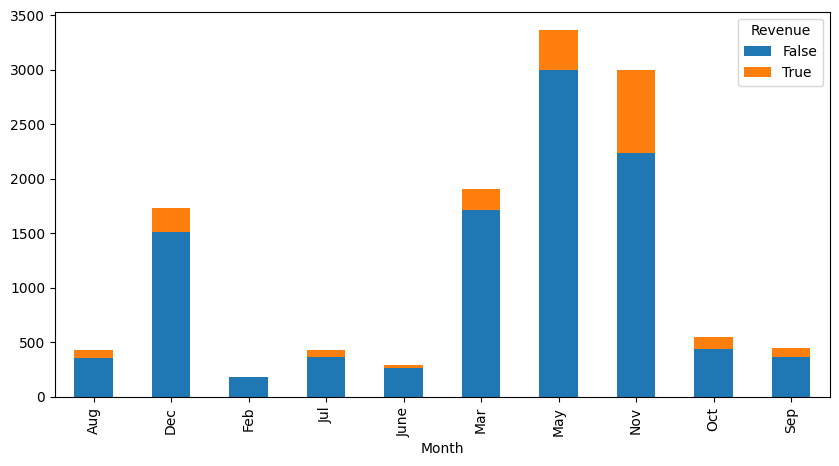

In [ ]:
data.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: xlabel='Weekend'>

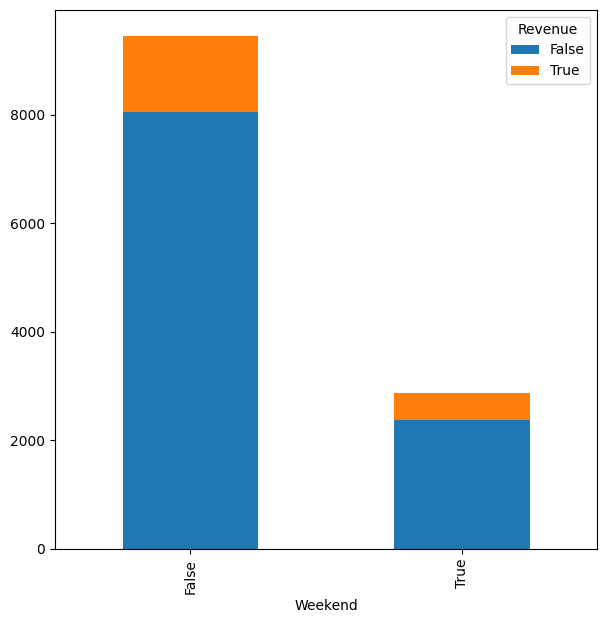

In [ ]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(7,7))

<Axes: ylabel='VisitorType'>

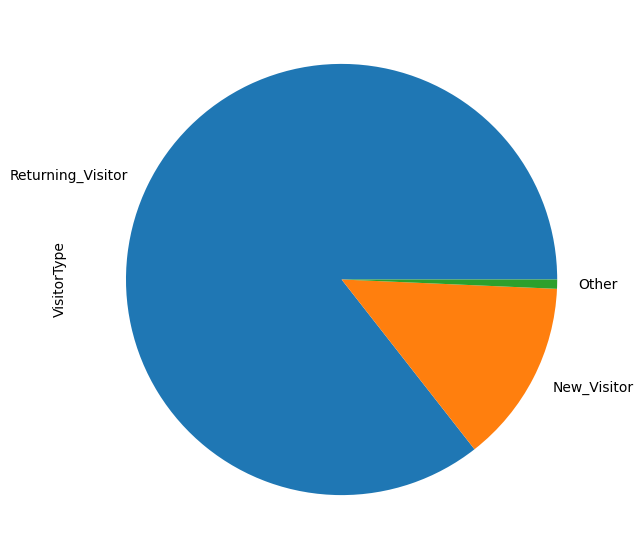

In [ ]:
data.VisitorType.value_counts().plot.pie(y='VisitorType',figsize=(7,7))

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<Axes: >

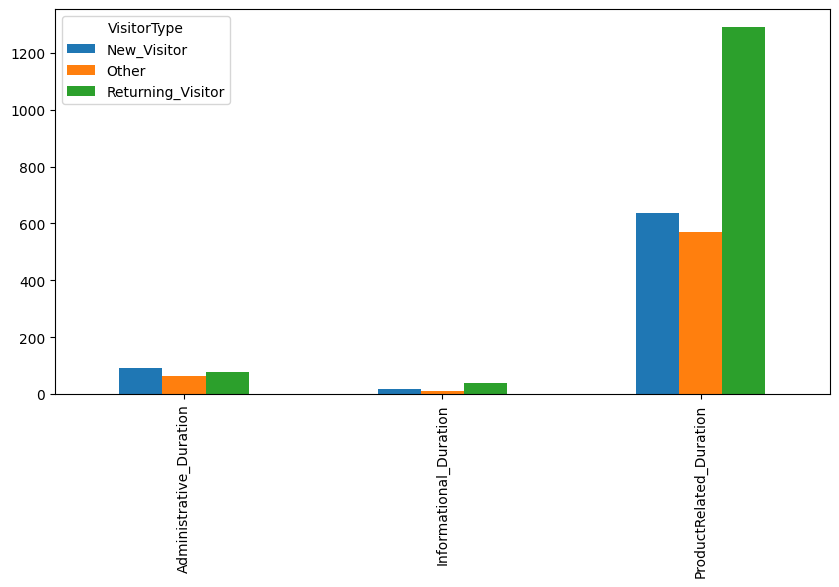

In [ ]:
admin_dpt=data[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))


array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

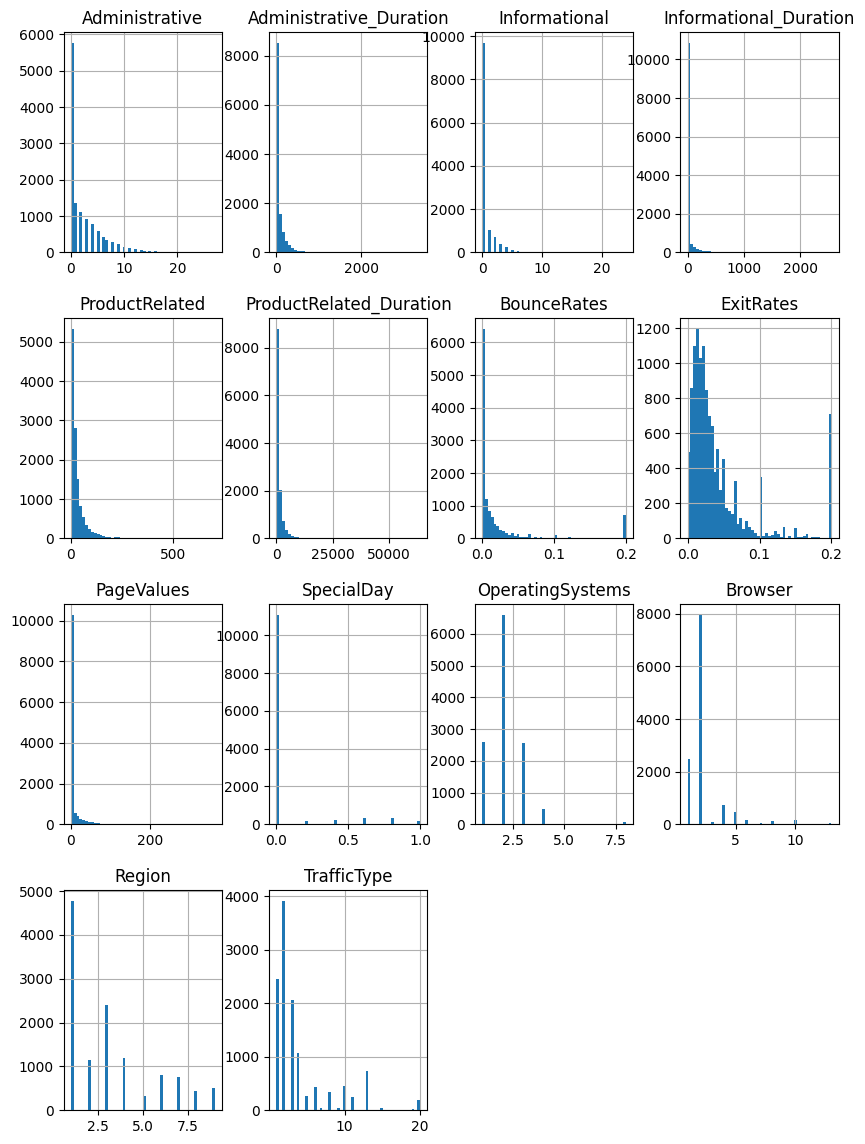

In [ ]:
data.hist(bins=50,figsize=(10,14))

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data['Month']=data['Month'].map(Month)


In [ ]:
VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data['VisitorType']=data['VisitorType'].map(VisitorType)


<Axes: >

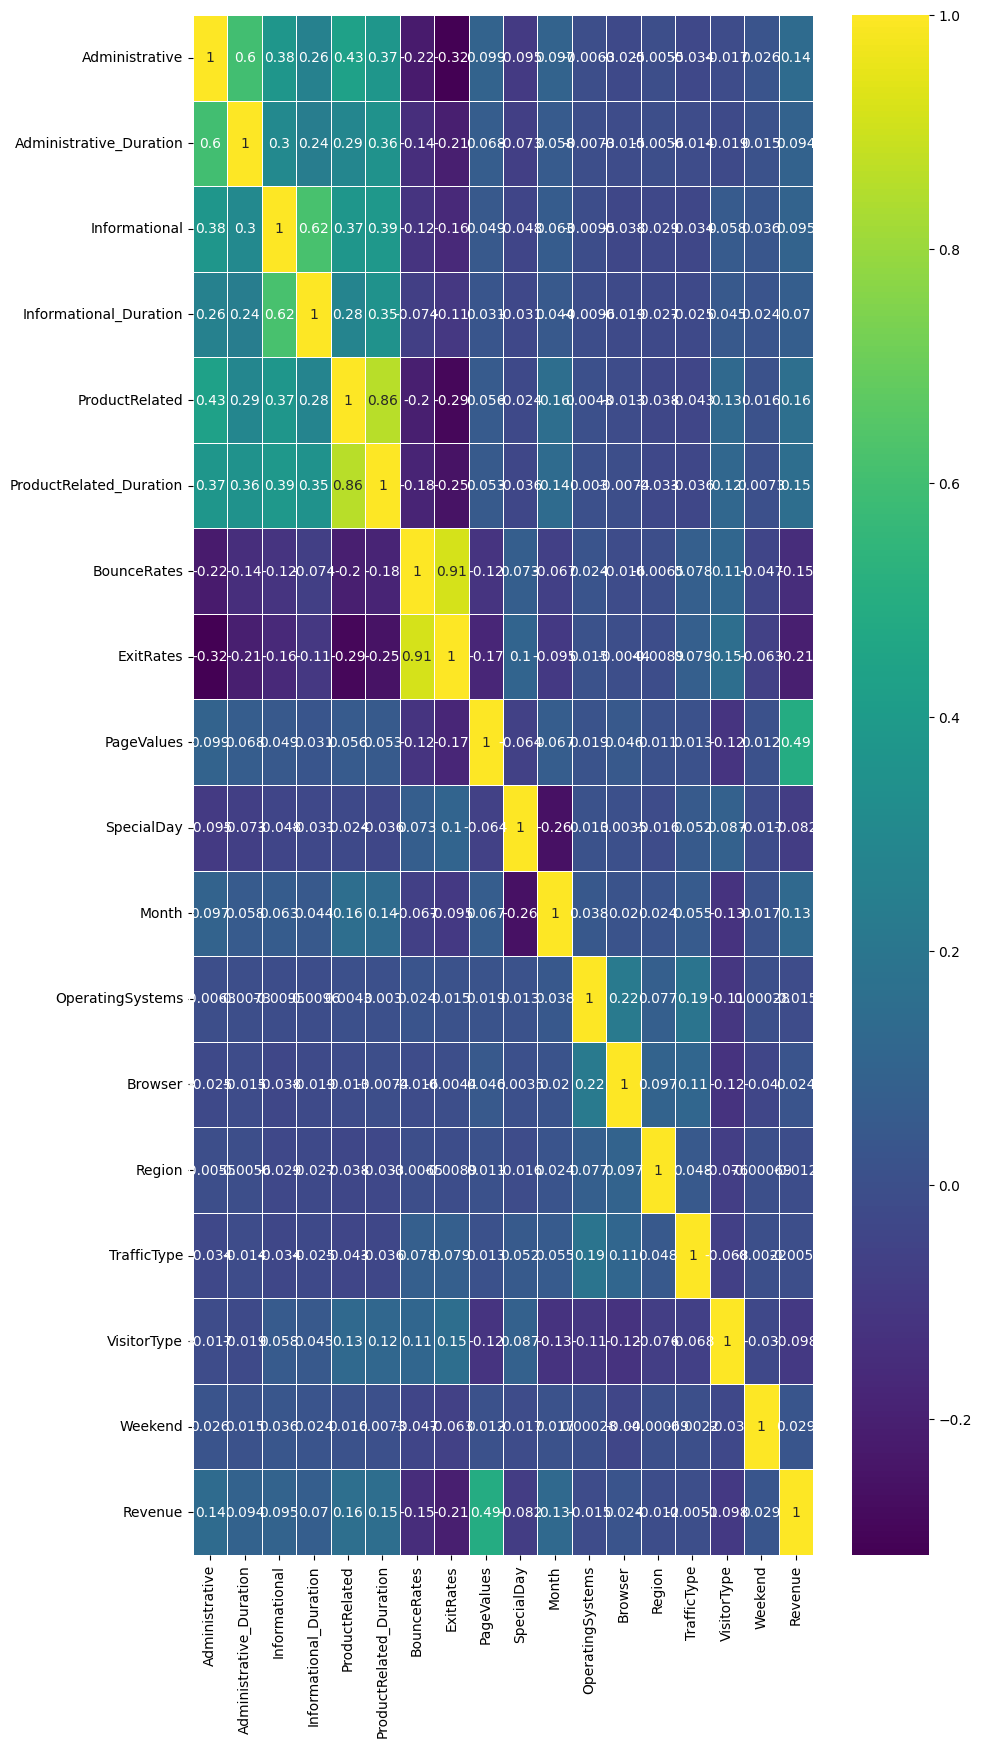

In [ ]:
d={True:1,False:0}
data['Weekend']=data['Weekend'].map(d)
data['Revenue']=data['Revenue'].map(d)
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


In [ ]:
from sklearn.preprocessing import StandardScaler

SS=StandardScaler()
scaled_features=SS.fit_transform(data.drop('Revenue',axis=1))
scaled_features


array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.76262903,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.26573535,
         0.40102509, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.21873304,
         0.40102509,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.72183936,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
        -2.25167844,  1.81635987]])

In [ ]:
data_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


In [ ]:
#We need split train data and testdata. we can apply that for any one of the algo once we split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Revenue'], test_size=0.33, random_state=42)

knn=KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)


In [ ]:
#now we are ready to take the metrics for our KNN classifier
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[3378   58]
 [ 446  187]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3436
           1       0.76      0.30      0.43       633

    accuracy                           0.88      4069
   macro avg       0.82      0.64      0.68      4069
weighted avg       0.86      0.88      0.85      4069



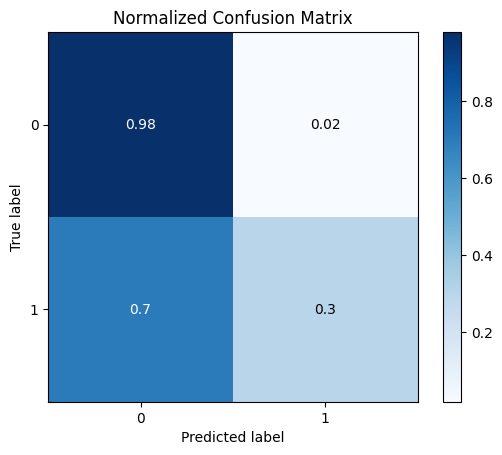

In [ ]:
# to make the report our confustion metrics using skplot
!pip install -q scikit-plot
import scikitplot  as skplt

skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
print(classification_report(y_test,pred))